## <span style="color:#0070C0; font-weight: 600; font-size:1.2em;"> Demo 1: Reading, visualizing and preprocessing raster data

### <span style="color:#0070C0; font-weight: 600; font-size:1.2em;"> Learning objectives

- <span style="font-size:1.3em"> Read raster data and explore its properties </span>
- <span style="font-size:1.3em"> Visualize raster data and apply preprocessing </span>
- <span style="font-size:1.3em"> Batch processing </span>

### Import relevant modules

In [2]:
import arcpy
arcpy.CheckOutExtension('Spatial')
arcpy.CheckOutExtension('Image')
from arcpy.sa import *
from arcpy.ia import *

### Set environment workspace

In [3]:
arcpy.env.workspace = r'C:\arcpy-working-with-raster-data-2024\DevSummit\PythonRaster\Data\Demo1\Data.gdb'

### Reading a raster dataset

In [4]:
# Raster object

elev = Raster(r'Elevation')

### Visualize data

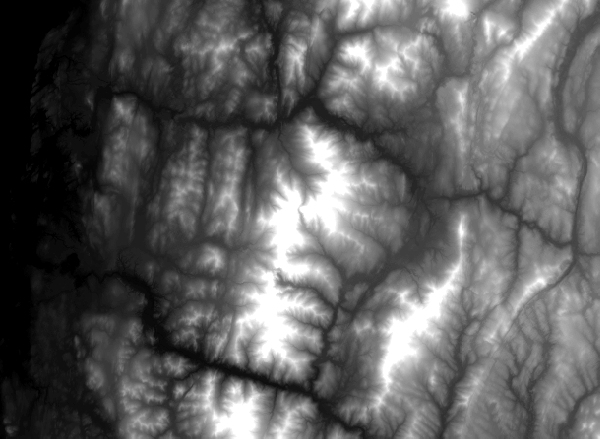

In [5]:
elev

### Raster object properties and methods

<span style="font-size:1.2em"> Refer to [Arcpy Raster documentation](https://pro.arcgis.com/en/pro-app/latest/arcpy/classes/raster-object.htm) for the full list of properties and methods with their respective descriptions.</span>

<span style="font-size:1.2em"> Listing all properties and methods available for a Raster object </span>

In [6]:
for property in dir(elev):
    if "_" not in property:
        print(f"{property}, \n")

RAT, 

addDimension, 

appendSlices, 

bandCount, 

bandNames, 

bands, 

blockSize, 

catalogPath, 

catalogPaths, 

compressionType, 

computeGSD, 

computeHistograms, 

computeStatistics, 

exportImage, 

extent, 

format, 

fromSTACItem, 

functions, 

getBandProperty, 

getColormap, 

getDimensionAttributes, 

getDimensionNames, 

getDimensionValues, 

getHistograms, 

getProperty, 

getRasterBands, 

getRasterInfo, 

getStatistics, 

getVariableAttributes, 

hasRAT, 

hasTranspose, 

height, 

isConstant, 

isEmpty, 

isInteger, 

isMultidimensional, 

isTemporary, 

maximum, 

mdinfo, 

mean, 

meanCellHeight, 

meanCellWidth, 

median, 

minimum, 

name, 

names, 

noDataValue, 

noDataValues, 

path, 

pixelType, 

properties, 

read, 

readOnly, 

removeVariables, 

renameBand, 

renameVariable, 

save, 

setBandProperty, 

setColormap, 

setHistograms, 

setProperty, 

setStatistics, 

setVariableAttributes, 

slices, 

spatialReference, 

standardDeviation, 

sum, 

uncompr

In [7]:
## Accessing one property at a time

elev.height

1783

<span style="font-size:1.2em"> If you will be populating the raster with calculations from new analysis, you need to crate a new raster, otherwise, using a function or tool by itself creates a new raster object. </span>

In [8]:
elev_rasterInfo = elev.getRasterInfo() 

In [9]:
new_raster = Raster(elev_rasterInfo)  # Creates a new raster with the same characteristics as elev

In [10]:
# print(elev_rasterInfo.toJSONString())
## See all properties in an organized format
import json
print(json.dumps(json.loads(elev_rasterInfo.toJSONString()), indent=2))

{
  "extent": {
    "xmin": 439952.113762345,
    "ymin": 200181.28469451156,
    "xmax": 513122.113762345,
    "ymax": 253671.28469451156,
    "spatialReference": {
      "wkt": "PROJCS[\"NAD_1983_StatePlane_Vermont_FIPS_4400\",GEOGCS[\"GCS_North_American_1983\",DATUM[\"D_North_American_1983\",SPHEROID[\"GRS_1980\",6378137.0,298.257222101]],PRIMEM[\"Greenwich\",0.0],UNIT[\"Degree\",0.0174532925199433]],PROJECTION[\"Transverse_Mercator\"],PARAMETER[\"False_Easting\",500000.0],PARAMETER[\"False_Northing\",0.0],PARAMETER[\"Central_Meridian\",-72.5],PARAMETER[\"Scale_Factor\",0.9999642857142857],PARAMETER[\"Latitude_Of_Origin\",42.5],UNIT[\"Meter\",1.0]],VERTCS[\"Unknown VCS\",VDATUM[\"Unknown\"],PARAMETER[\"Vertical_Shift\",0.0],PARAMETER[\"Direction\",1.0],UNIT[\"Foot_US\",0.3048006096012192]]"
    }
  },
  "geodataXform": {
    "spatialReference": {
      "wkt": "PROJCS[\"NAD_1983_StatePlane_Vermont_FIPS_4400\",GEOGCS[\"GCS_North_American_1983\",DATUM[\"D_North_American_1983\",SPHEROID

### Data preprocessing

In [11]:
elev_clip = Clip(elev, r'StudyArea')

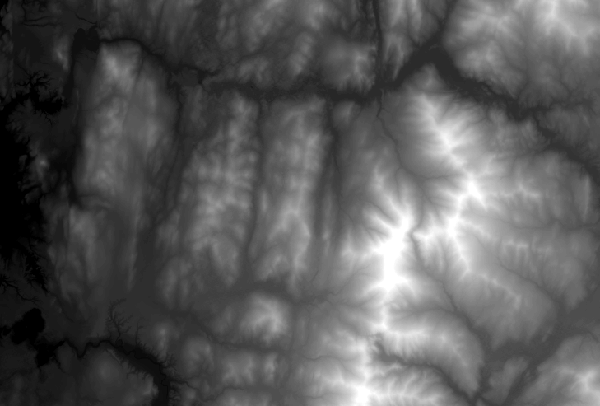

In [12]:
elev_clip

In [13]:
elev_visualize = Render(elev_clip, colormap='Elevation #1') # Render function

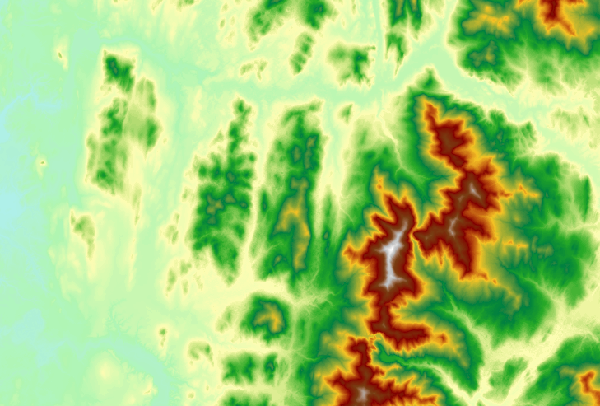

In [14]:
elev_visualize

### Saving a temporary raster

In [20]:
elev_clip.save(r'C:\arcpy-working-with-raster-data-2024\DevSummit\PythonRaster\Data\Demo1\Output.gdb\elev_final')

### List raster datasets in a workspace to batch process

In [21]:
arcpy.env.workspace = r'C:\arcpy-working-with-raster-data-2024\DevSummit\PythonRaster\Data\Demo1\Data.gdb'

In [17]:
# arcpy.ListRasters (is it function or method?)
rasters = arcpy.ListRasters()  # list all rasters
#rasters = arcpy.ListRasters('e*')   # list raster data with name starting with e
#rasters = arcpy.ListRasters('*','GRID')   # list all GRID format raster

In [18]:
rasters

['Elevation', 'Landuse', 'Elevation_sa', 'Landuse_sa']

<span style="font-size:1.2em"> Remember that `arcpy.ListRasters` list all rasters in the workspace. If you want to write or save an output raster from processing on a different location, you need to specify this location. </span>

In [19]:
for raster in rasters:
    raster_clip = Clip(raster, r'StudyArea')
    raster_clip.save(raster + '_sa')